In [490]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [491]:

df = pd.read_csv("autisminchildren.csv")
df.head()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,pdd,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,Others,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,Others,yes,no,Jordan,no,4,4-11 years,NaN,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [492]:
df.info()
print(df.shape)
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               292 non-null    int64  
 1   A1_Score         292 non-null    int64  
 2   A2_Score         292 non-null    int64  
 3   A3_Score         292 non-null    int64  
 4   A4_Score         292 non-null    int64  
 5   A5_Score         292 non-null    int64  
 6   A6_Score         292 non-null    int64  
 7   A7_Score         292 non-null    int64  
 8   A8_Score         292 non-null    int64  
 9   A9_Score         292 non-null    int64  
 10  A10_Score        292 non-null    int64  
 11  age              288 non-null    float64
 12  gender           292 non-null    object 
 13  ethnicity        292 non-null    object 
 14  jundice          292 non-null    object 
 15  pdd              292 non-null    object 
 16  contry_of_res    292 non-null    object 
 17  used_app_before 

In [493]:
#Preprossesing: Data Cleaing
missing_vals=df.isnull().sum()
print(missing_vals[missing_vals>0])
total_missing=missing_vals.sum()
print(f"Total missing values: {total_missing}")

age          4
relation    39
dtype: int64
Total missing values: 43


In [494]:
df.drop(["relation"], axis=1, inplace=True)

In [495]:
missing_vals=df.isnull().sum()
print(missing_vals[missing_vals>0])
total_missing=missing_vals.sum()
print(f"Total missing values: {total_missing}")

age    4
dtype: int64
Total missing values: 4


In [496]:
df.dropna(inplace=True)

In [497]:
missing_vals=df.isnull().sum()
print(missing_vals[missing_vals>0])
total_missing=missing_vals.sum()
print(f"Total missing values: {total_missing}")

Series([], dtype: int64)
Total missing values: 0


In [498]:
df["Class/ASD"].value_counts(normalize=True) * 100

Class/ASD
NO     51.736111
YES    48.263889
Name: proportion, dtype: float64

In [499]:
#Encoding 
df["Class/ASD"] = (
    df["Class/ASD"]
    .astype(str)       
    .str.strip()       
    .str.lower()       
)
df["Class/ASD"] = (df["Class/ASD"] == "yes").astype(int)

print(df["Class/ASD"].unique())

[0 1]


In [500]:
df["gender"] = (df["gender"] == "m").astype(int)
df["gender"].value_counts()

gender
1    204
0     84
Name: count, dtype: int64

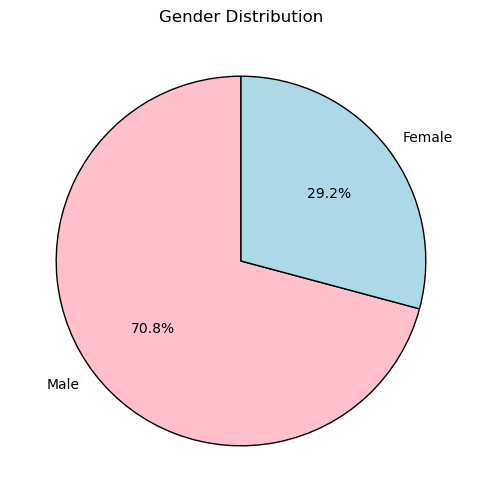

In [501]:
gender_precent = df["gender"].value_counts(normalize=True) * 100

plt.figure(figsize=(6,6))
plt.pie(gender_precent, labels=gender_precent.index.map({0:"Female", 1:"Male"}),
        autopct="%.1f%%", startangle=90, colors=["pink","lightblue"],
        wedgeprops={'edgecolor':'black'})
plt.title("Gender Distribution")
plt.show()

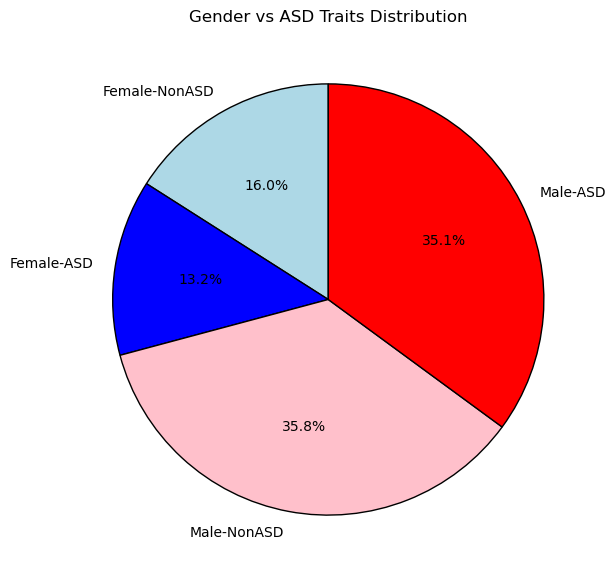

In [502]:
ct = df.groupby(["gender", "Class/ASD"]).size().reset_index(name="count")
ct["label"] = ct.apply(lambda x: 
                       ("Male" if x["gender"]==1 else "Female") + 
                       ("-ASD" if x["Class/ASD"]==1 else "-NonASD"), axis=1)

plt.figure(figsize=(7,7))
plt.pie(ct["count"], labels=ct["label"], autopct="%.1f%%", startangle=90, 
        colors=["lightblue","blue","pink","red"], wedgeprops={'edgecolor':'black'})
plt.title("Gender vs ASD Traits Distribution")
plt.show()


In [503]:
df["pdd"] = (df["pdd"] == "yes").astype(int)

In [504]:
df["jundice"] = (df["jundice"] == "yes").astype(int)
df["jundice"].value_counts()

jundice
0    210
1     78
Name: count, dtype: int64

In [505]:
print(df.columns.tolist())

['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender', 'ethnicity', 'jundice', 'pdd', 'contry_of_res', 'used_app_before', 'result', 'age_desc', 'Class/ASD']


In [506]:
#input feautres to ASD traits
numerical_df = df.select_dtypes(include='number')
corr = numerical_df.corr()["Class/ASD"]

In [507]:
corr

id           0.009447
A1_Score     0.385132
A2_Score     0.232278
A3_Score     0.408941
A4_Score     0.562570
A5_Score     0.397168
A6_Score     0.415134
A7_Score     0.278047
A8_Score     0.437324
A9_Score     0.486175
A10_Score    0.432280
age          0.075835
gender       0.038856
jundice     -0.025735
pdd         -0.048992
result       0.839258
Class/ASD    1.000000
Name: Class/ASD, dtype: float64

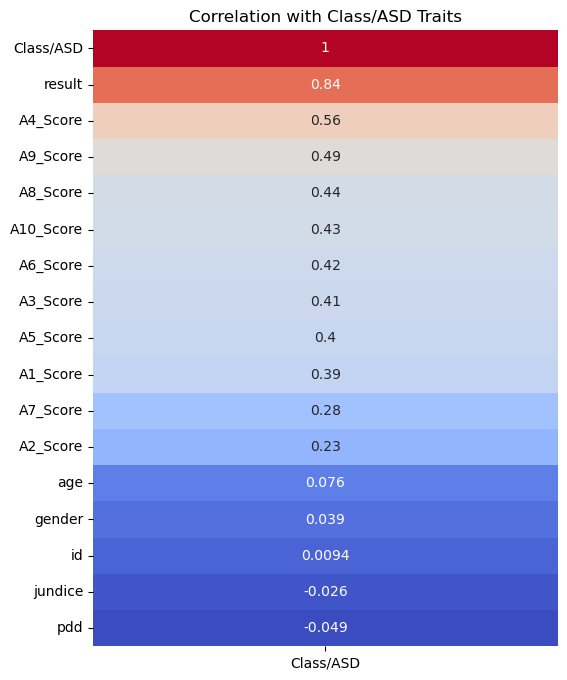

In [508]:
numerical_df = df.select_dtypes(include='number')
corr = numerical_df.corr()
plt.figure(figsize=(6,8))
sns.heatmap(corr[["Class/ASD"]].sort_values(by="Class/ASD", ascending=False), 
            annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation with Class/ASD Traits")
plt.show()

In [509]:
df["Class/ASD"].value_counts()

Class/ASD
0    149
1    139
Name: count, dtype: int64

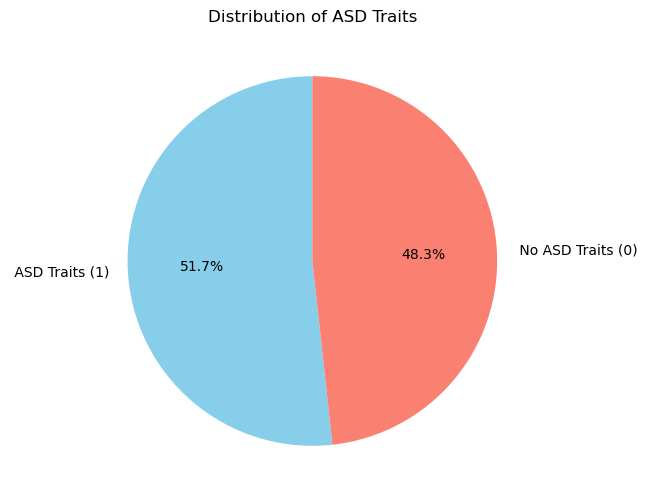

In [510]:
#(0 = No ASD Traits, 1 = ASD Traits)
counts = df["Class/ASD"].value_counts()
labels = [" ASD Traits (1)", " No ASD Traits (0)"]
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct="%.1f%%", startangle=90, colors=["skyblue", "salmon"])
plt.title("Distribution of ASD Traits")
plt.show()

Class/ASD   0   1
result           
0           1   0
1           5   0
2           9   0
3          21   0
4          33   0
5          41   0
6          39   0
7           0  42
8           0  44
9           0  32
10          0  21


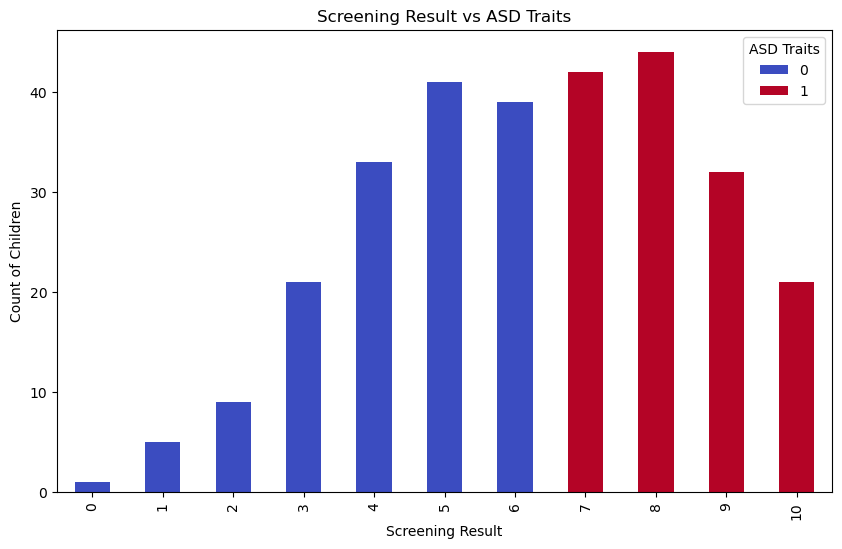

In [511]:
score_relation = df.groupby(["result", "Class/ASD"]).size().unstack(fill_value=0)
print(score_relation)
score_relation.plot(kind="bar", stacked=True, figsize=(10,6), colormap="coolwarm")
plt.title("Screening Result vs ASD Traits")
plt.xlabel("Screening Result")
plt.ylabel("Count of Children")
plt.legend(title="ASD Traits")
plt.show()
#result of 7 or above means that child has ASD traits 

In [512]:
df.select_dtypes(include='number').corr()

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,jundice,pdd,result,Class/ASD
id,1.000000,0.013330,0.014985,0.076184,-0.041623,-0.007286,0.004465,0.091868,-0.038231,-0.004377,0.087310,0.042524,0.033142,0.028320,0.006444,0.038552,0.009447
A1_Score,0.013330,1.000000,0.031035,0.082894,0.260673,0.162437,0.107347,0.026625,0.054411,0.146239,0.090300,0.101390,-0.057534,-0.057832,-0.021799,0.411021,0.385132
A2_Score,0.014985,0.031035,1.000000,0.104661,0.125696,-0.056267,0.128827,0.020296,0.014891,0.090982,0.073755,-0.045817,-0.031907,0.192546,-0.077835,0.330371,0.232278
A3_Score,0.076184,0.082894,0.104661,1.000000,0.285309,0.137638,0.239904,0.015710,0.198462,0.266105,0.160192,-0.140640,0.059733,0.054391,-0.050961,0.505647,0.408941
A4_Score,-0.041623,0.260673,0.125696,0.285309,1.000000,0.124971,0.351847,0.019812,0.287762,0.335892,0.110969,0.170580,0.036484,-0.110969,0.017615,0.612930,0.562570
A5_Score,-0.007286,0.162437,-0.056267,0.137638,0.124971,1.000000,0.181471,0.176543,0.152371,0.076180,0.261644,-0.069615,0.052926,0.027067,0.069356,0.441484,0.397168
A6_Score,0.004465,0.107347,0.128827,0.239904,0.351847,0.181471,1.000000,-0.055988,0.290175,0.279240,0.250502,0.043490,0.047085,0.025517,-0.099532,0.569639,0.415134
A7_Score,0.091868,0.026625,0.020296,0.015710,0.019812,0.176543,-0.055988,1.000000,0.152411,0.214872,0.038338,0.123534,-0.014993,0.041672,-0.014654,0.342729,0.278047
A8_Score,-0.038231,0.054411,0.014891,0.198462,0.287762,0.152371,0.290175,0.152411,1.000000,0.215207,0.147819,0.052083,0.159164,-0.054048,-0.113851,0.531223,0.437324
A9_Score,-0.004377,0.146239,0.090982,0.266105,0.335892,0.076180,0.279240,0.214872,0.215207,1.000000,0.183295,0.092211,-0.050292,-0.011395,-0.024578,0.594517,0.486175


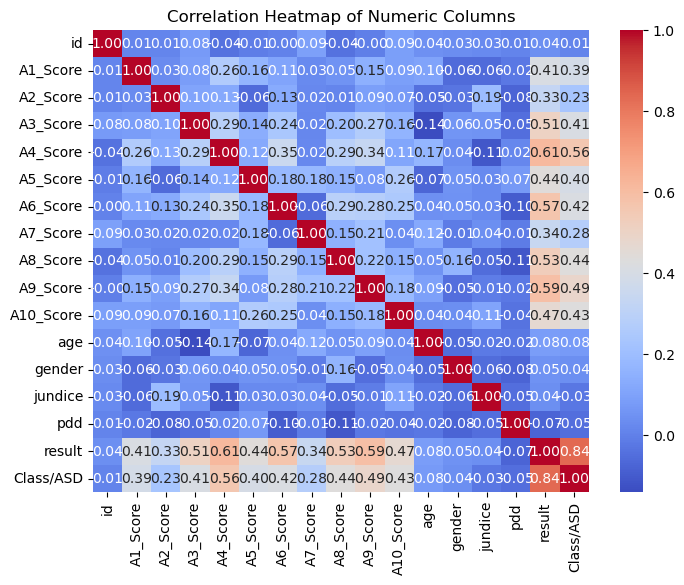

In [513]:

corr_matrix = df.select_dtypes(include='number').corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

In [514]:
features = ["A1_Score","A2_Score","A3_Score","A4_Score","A5_Score","A6_Score","A7_Score","A8_Score","A9_Score","A10_Score"]
corr_with_target = df[features + ["Class/ASD"]].corr()["Class/ASD"].drop("Class/ASD")
print("Correlation of each question with ASD Traits:")
print(corr_with_target)

Correlation of each question with ASD Traits:
A1_Score     0.385132
A2_Score     0.232278
A3_Score     0.408941
A4_Score     0.562570
A5_Score     0.397168
A6_Score     0.415134
A7_Score     0.278047
A8_Score     0.437324
A9_Score     0.486175
A10_Score    0.432280
Name: Class/ASD, dtype: float64


In [515]:
features = ["A1_Score","A2_Score","A3_Score","A4_Score","A5_Score","A6_Score","A7_Score","A8_Score","A9_Score","A10_Score"]
impact = {}
for q in features:
    impact[q] = df[df[q] == 1]["Class/ASD"].mean()

print("Probability of ASD Traits if question answered Yes:")
for k, df_ in impact.items():
    print(f"{k}: {df_:.2f}")

Probability of ASD Traits if question answered Yes:
A1_Score: 0.63
A2_Score: 0.59
A3_Score: 0.60
A4_Score: 0.74
A5_Score: 0.60
A6_Score: 0.61
A7_Score: 0.59
A8_Score: 0.70
A9_Score: 0.73
A10_Score: 0.61


In [516]:
#QUESTION 4 and 9 have the strongest corelation so if either were answered yes there is a strong probability that child has ASD traits
#A4 Does your child point to share interest with you? (e.g. poin9ng at an interes9ng sight)
#A9 Does your child use simple gestures? (e.g. wave goodbye)

In [517]:
#which question was answered yes the most
questions = ["A1_Score","A2_Score","A3_Score","A4_Score","A5_Score","A6_Score","A7_Score","A8_Score","A9_Score","A10_Score"]
yes_percentage = (df[questions] == 1).mean() * 100  # 1 = Yes
yes_percentage = yes_percentage.sort_values(ascending=False)
print(yes_percentage)

A5_Score     75.000000
A3_Score     74.305556
A10_Score    72.916667
A6_Score     71.180556
A1_Score     63.541667
A7_Score     60.763889
A4_Score     55.208333
A2_Score     53.472222
A9_Score     49.652778
A8_Score     49.305556
dtype: float64


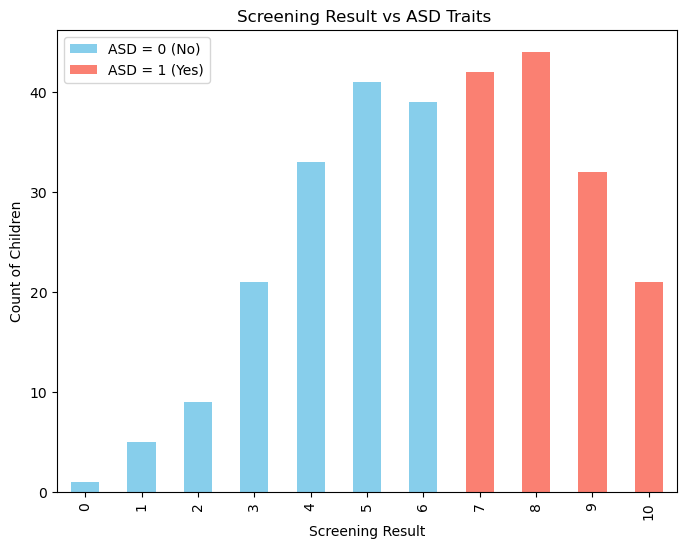

In [518]:
#question A5 : Does your child pretend? (e.g. care for dolls, talk on a toy phone
score_relation = df.groupby(["result","Class/ASD"]).size().unstack(fill_value=0)

score_relation.plot(kind="bar", stacked=True, figsize=(8,6), color=["skyblue","salmon"])
plt.title("Screening Result vs ASD Traits ")
plt.xlabel("Screening Result")
plt.ylabel("Count of Children")
plt.legend(["ASD = 0 (No)", "ASD = 1 (Yes)"])
plt.show()

In [519]:
above_7 = score_relation.loc[score_relation.index >= 7].sum().sum()
print("Total kids with score >= 7:", above_7)

Total kids with score >= 7: 139


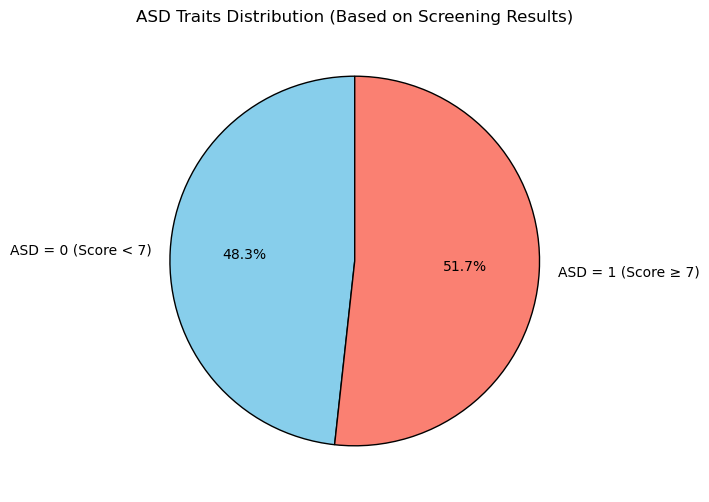

In [520]:
sizes = [139, 149]
labels = ["ASD = 0 (Score < 7)", "ASD = 1 (Score ≥ 7)"]
colors = ["skyblue", "salmon"]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct="%.1f%%", startangle=90, colors=colors, wedgeprops={'edgecolor':'black'})
plt.title("ASD Traits Distribution (Based on Screening Results)")
plt.show()

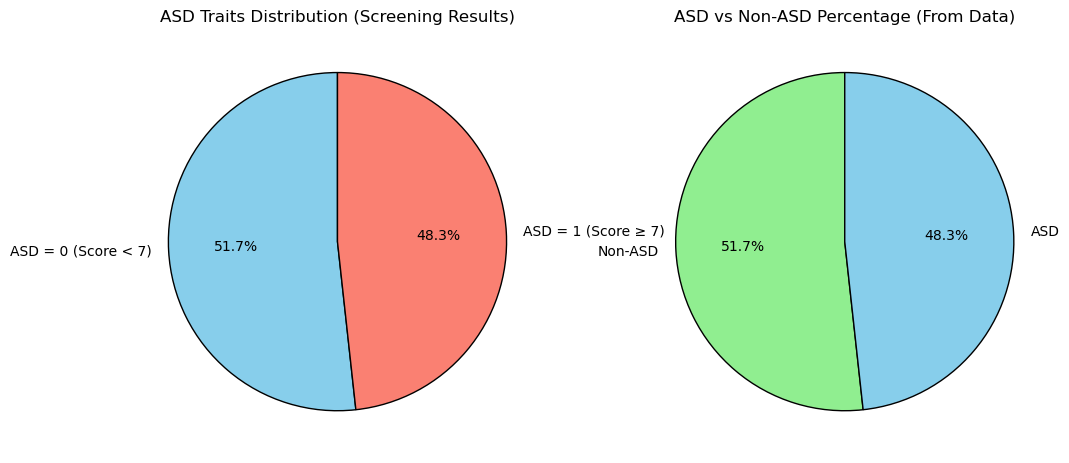

In [521]:
sizes = [149, 139]
labels1 = ["ASD = 0 (Score < 7)", "ASD = 1 (Score ≥ 7)"]
colors1 = ["skyblue", "salmon"]

counts = df["Class/ASD"].value_counts(normalize=True) * 100
counts.index = counts.index.map({0: "Non-ASD", 1: "ASD"})
labels2 = counts.index
sizes2 = counts.values
colors2 = ["lightgreen","skyblue"]

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.pie(sizes, labels=labels1, autopct="%.1f%%", startangle=90, colors=colors1, wedgeprops={'edgecolor':'black'})
plt.title("ASD Traits Distribution (Screening Results)")

plt.subplot(1,2,2)
plt.pie(sizes2, labels=labels2, autopct="%.1f%%", startangle=90, colors=colors2, wedgeprops={'edgecolor':'black'})
plt.title("ASD vs Non-ASD Percentage (From Data)")

plt.show()

In [522]:
numerical_df = df.select_dtypes(include='number')
corr = numerical_df.corr()["Class/ASD"]

In [523]:
corr


id           0.009447
A1_Score     0.385132
A2_Score     0.232278
A3_Score     0.408941
A4_Score     0.562570
A5_Score     0.397168
A6_Score     0.415134
A7_Score     0.278047
A8_Score     0.437324
A9_Score     0.486175
A10_Score    0.432280
age          0.075835
gender       0.038856
jundice     -0.025735
pdd         -0.048992
result       0.839258
Class/ASD    1.000000
Name: Class/ASD, dtype: float64

In [524]:
df_new = df.drop(["id" , "jundice" , "pdd", "contry_of_res", "ethnicity", "used_app_before", "age_desc" ] , axis = 1)

In [525]:
df_new

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,result,Class/ASD
0,1,1,0,0,1,1,0,1,0,0,6.0,1,5,0
1,1,1,0,0,1,1,0,1,0,0,6.0,1,5,0
2,1,1,0,0,0,1,1,1,0,0,6.0,1,5,0
3,0,1,0,0,1,1,0,0,0,1,5.0,0,4,0
4,1,1,1,1,1,1,1,1,1,1,5.0,1,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,7.0,0,10,1
288,1,0,0,0,1,0,1,0,0,1,7.0,0,4,0
289,1,0,1,1,1,1,1,0,0,1,4.0,1,7,1
290,1,1,1,0,1,1,1,1,1,1,4.0,1,9,1


In [534]:
x = df_new.iloc[: , 0:13]
y = df_new.iloc[: , -1]

In [535]:
x #model inputs

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,result
0,1,1,0,0,1,1,0,1,0,0,6.0,1,5
1,1,1,0,0,1,1,0,1,0,0,6.0,1,5
2,1,1,0,0,0,1,1,1,0,0,6.0,1,5
3,0,1,0,0,1,1,0,0,0,1,5.0,0,4
4,1,1,1,1,1,1,1,1,1,1,5.0,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,1,1,1,1,1,1,1,1,1,1,7.0,0,10
288,1,0,0,0,1,0,1,0,0,1,7.0,0,4
289,1,0,1,1,1,1,1,0,0,1,4.0,1,7
290,1,1,1,0,1,1,1,1,1,1,4.0,1,9


In [536]:
y #label we want to predict

0      0
1      0
2      0
3      0
4      1
      ..
287    1
288    0
289    1
290    1
291    0
Name: Class/ASD, Length: 288, dtype: int64

In [537]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size = 0.2, random_state=42)

In [538]:
x_test

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,result
46,0,1,1,0,1,1,0,0,0,0,4.0,0,4
161,1,0,0,0,1,1,1,1,1,1,9.0,1,7
260,1,1,1,1,0,1,0,0,0,1,4.0,1,6
43,1,0,1,1,1,1,0,1,1,1,4.0,0,8
185,1,0,1,0,1,0,1,0,1,1,4.0,1,6
9,0,0,1,1,1,0,1,1,0,0,11.0,0,5
47,1,1,1,0,1,0,1,1,0,1,6.0,1,7
176,1,0,1,1,1,0,0,0,0,0,8.0,1,4
79,0,1,1,1,0,1,0,1,1,0,7.0,1,6
199,1,0,0,0,1,0,1,0,0,1,9.0,1,4


In [539]:
y_test

46     0
161    1
260    0
43     1
185    0
9      0
47     1
176    0
79     0
199    0
226    0
34     0
118    0
283    0
57     1
220    1
5      0
228    0
241    0
77     0
271    0
86     1
115    1
290    1
75     0
254    0
144    0
151    1
113    1
61     1
103    0
189    1
158    1
240    0
187    1
172    1
235    0
147    1
206    1
119    0
169    1
258    0
159    1
135    0
30     1
22     0
24     1
162    0
148    0
171    0
243    0
257    1
99     0
211    0
177    1
183    0
281    0
6      1
Name: Class/ASD, dtype: int64

In [540]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [541]:
#Scaling: result column in input data
x_train_scaled = scaler.fit_transform(x_train[["result"]])

In [542]:
x_train.shape

(230, 13)

In [543]:
x_train_scaled_v = pd.DataFrame(
    x_train_scaled,               
    columns=["result"],   
    index=x_train.index           
)

In [544]:
x_train_binary = x_train.drop(columns=["result"])

In [545]:
x_train_final = pd.concat([x_train_binary, x_train_scaled_v], axis=1)
print(x_train_final.head())

    A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
95         1         0         1         0         1         1         1   
68         0         0         1         0         1         1         1   
64         1         0         1         1         0         0         0   
81         0         1         1         1         1         1         1   
25         0         0         1         1         1         0         1   

    A8_Score  A9_Score  A10_Score  age  gender    result  
95         1         0          1  7.0       1  0.342194  
68         0         1          0  4.0       0 -0.537187  
64         1         0          1  8.0       1 -0.537187  
81         1         1          1  7.0       1  1.221574  
25         1         1          0  6.0       1 -0.097497  


In [546]:
x_test_scaled = scaler.transform(x_test[["result"]])

In [547]:
x_test_scaled.shape

(58, 1)

In [548]:
x_test_scaled_v = pd.DataFrame(
    x_test_scaled,               
    columns=["result"],   
    index=x_test.index           
)

In [549]:
x_test_binary = x_test.drop(columns=["result"])

In [550]:
x_test_final = pd.concat([x_test_binary, x_test_scaled_v], axis=1)
print(x_test_final.head()) 

     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
46          0         1         1         0         1         1         0   
161         1         0         0         0         1         1         1   
260         1         1         1         1         0         1         0   
43          1         0         1         1         1         1         0   
185         1         0         1         0         1         0         1   

     A8_Score  A9_Score  A10_Score  age  gender    result  
46          0         0          0  4.0       0 -0.976877  
161         1         1          1  9.0       1  0.342194  
260         0         0          1  4.0       1 -0.097497  
43          1         1          1  4.0       0  0.781884  
185         0         1          1  4.0       1 -0.097497  


In [551]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=10000, random_state=0)

In [552]:
lr.fit(x_train_final , y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [553]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, lr.predict(x_test_final)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")

Logistic Regression model accuracy: 100.00%


In [554]:
y_pred = lr.predict(x_test_final)

In [555]:
y_test

46     0
161    1
260    0
43     1
185    0
9      0
47     1
176    0
79     0
199    0
226    0
34     0
118    0
283    0
57     1
220    1
5      0
228    0
241    0
77     0
271    0
86     1
115    1
290    1
75     0
254    0
144    0
151    1
113    1
61     1
103    0
189    1
158    1
240    0
187    1
172    1
235    0
147    1
206    1
119    0
169    1
258    0
159    1
135    0
30     1
22     0
24     1
162    0
148    0
171    0
243    0
257    1
99     0
211    0
177    1
183    0
281    0
6      1
Name: Class/ASD, dtype: int64

In [556]:
from sklearn.metrics import accuracy_score

In [557]:
accuracy_score(y_test , y_pred)*100

100.0

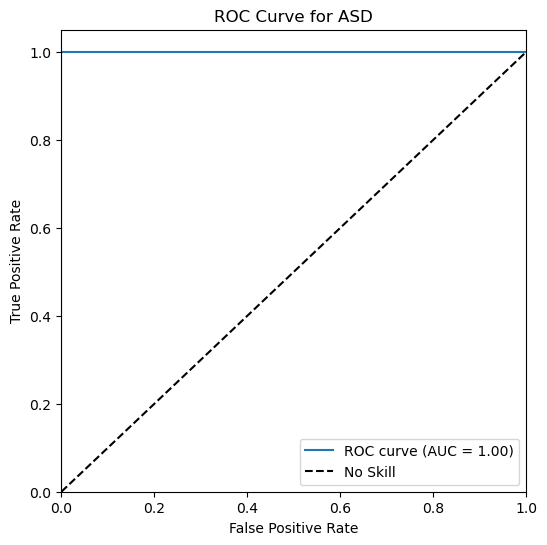

In [558]:
from sklearn.metrics import roc_curve, auc

y_score = lr.predict_proba(x_test_final)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ASD')
plt.legend(loc="lower right")
plt.show()

#since ROC is 1 that means that mode3l is perfectly seprating the test classes

In [559]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report 
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train_final, y_train)
y_pred_rf = rf.predict(x_test_final)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)
report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:\n", report)


Random Forest Accuracy: 1.0
Confusion Matrix:
 [[34  0]
 [ 0 24]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        24

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



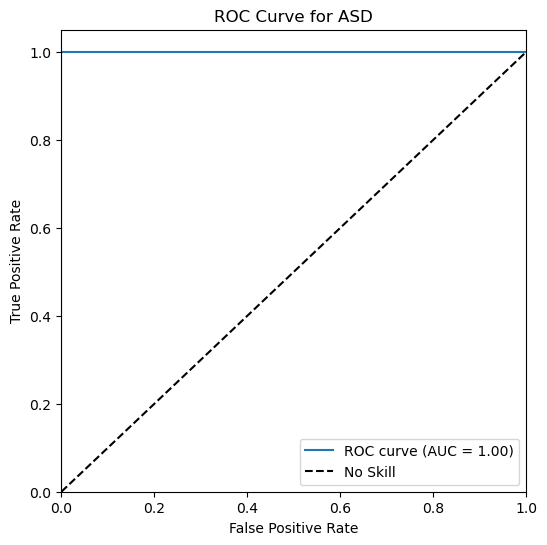

In [560]:
from sklearn.metrics import roc_curve, auc

y_score = rf.predict_proba(x_test_final)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ASD')
plt.legend(loc="lower right")
plt.show()

#since ROC is 1 that means that mode3l is perfectly seprating the test classes

In [561]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svm = SVC(kernel='rbf', probability=True, random_state=42)  
svm.fit(x_train_final, y_train)
y_pred_svm = svm.predict(x_test_final)
print("SVM accuracy:", accuracy_score(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:\n", cm)
report = classification_report(y_test, y_pred_rf)
print("\nClassification Report:\n", report)

SVM accuracy: 1.0
Confusion Matrix:
 [[34  0]
 [ 0 24]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        34
           1       1.00      1.00      1.00        24

    accuracy                           1.00        58
   macro avg       1.00      1.00      1.00        58
weighted avg       1.00      1.00      1.00        58



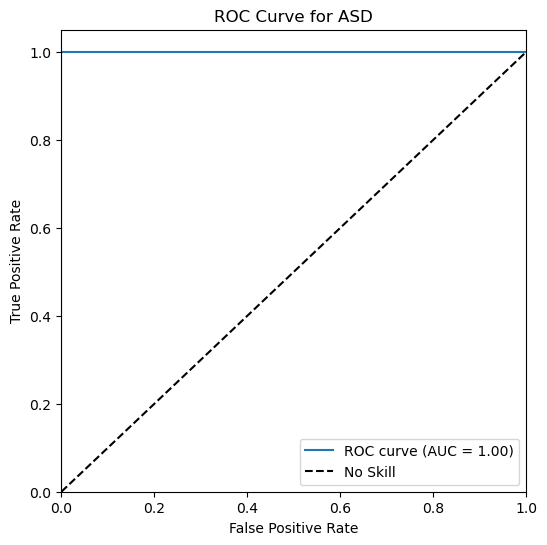

In [562]:
from sklearn.metrics import roc_curve, auc

y_score = svm.predict_proba(x_test_final)[:, 1]  
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for ASD')
plt.legend(loc="lower right")
plt.show()

#since ROC is 1 that means that mode3l is perfectly seprating the test classes

In [563]:
# 5-fold cross-validation to ensure accuracy
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(rf, x, y, cv=5)
print("Cross-validation accuracy mean:", np.mean(scores))
print("All fold scores:", scores)

svm_scores = cross_val_score(svm, x, y, cv=5)
print("\nSVM CV accuracy mean:", np.mean(svm_scores))
print("SVM fold scores:", svm_scores)

lr_scores = cross_val_score(lr, x, y, cv=5)
print("\nLogistic Regression CV accuracy mean:", np.mean(lr_scores))
print("Logistic Regression fold scores:", lr_scores)
#since result is strongly correlated to ASD it makes these predictions trivial

Cross-validation accuracy mean: 1.0
All fold scores: [1. 1. 1. 1. 1.]

SVM CV accuracy mean: 0.9964912280701753
SVM fold scores: [1.         1.         1.         1.         0.98245614]

Logistic Regression CV accuracy mean: 1.0
Logistic Regression fold scores: [1. 1. 1. 1. 1.]
